# House Price Predicting
 In this project I took a house data from Kaggle community and performed ML models like Linear Regression, Polynomial Regression, Decission Tree Regressor and Random Forest Regressor

In [54]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score

In [55]:
#Reading data
house_data=pd.read_csv("House data.csv")
house_data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [56]:
# Droping unnecessary features
house_data.drop(["Unnamed: 0","id","date"],axis=1,inplace=True)
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [57]:
#Data types of all the features
house_data.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [58]:
#Finding NAN values
house_data.isnull().sum()

price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [59]:
#Replacing NAN values with mean of there respective feature
mean=house_data['bedrooms'].mean()
house_data['bedrooms'].replace(np.nan,mean, inplace=True)
mean=house_data['bathrooms'].mean()
house_data['bathrooms'].replace(np.nan,mean, inplace=True)
house_data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [60]:
#First 5 records of the dataset
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [61]:
#Description of each feature in the dataset
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926378,0.768818,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [62]:
#Correlation between independent features and dependent feature
corr_matrix=house_data.corr()
corr_df=corr_matrix["price"].sort_values(ascending=False)
corr_df

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525738
view             0.397293
sqft_basement    0.323816
bedrooms         0.308797
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

In [63]:
#Considering only features with correlation value greater than equal to 0.3 with respect to dependent feature price
final_data=house_data[["lat","bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living","price"]]
#final_data.to_csv(r'C:\Users\user\ML\house.csv', index=False)
final_data.head()

,lat,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,sqft_living,price
0,47.5112,3.0,0,0,1.00,1340,1180,7,1180,221900.0
1,47.7210,3.0,400,0,2.25,1690,2170,7,2570,538000.0
2,47.7379,2.0,0,0,1.00,2720,770,6,770,180000.0
3,47.5208,4.0,910,0,3.00,1360,1050,7,1960,604000.0
4,47.6168,3.0,0,0,2.00,1800,1680,8,1680,510000.0


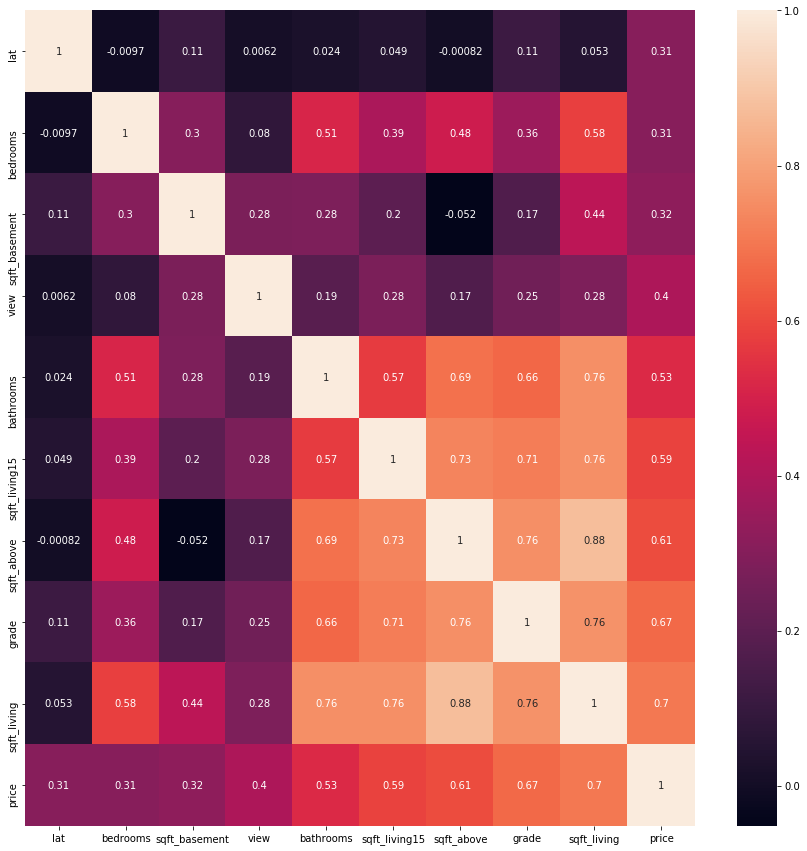

In [64]:
#Heat Map 
corr_matrix= final_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True)
plt.show()

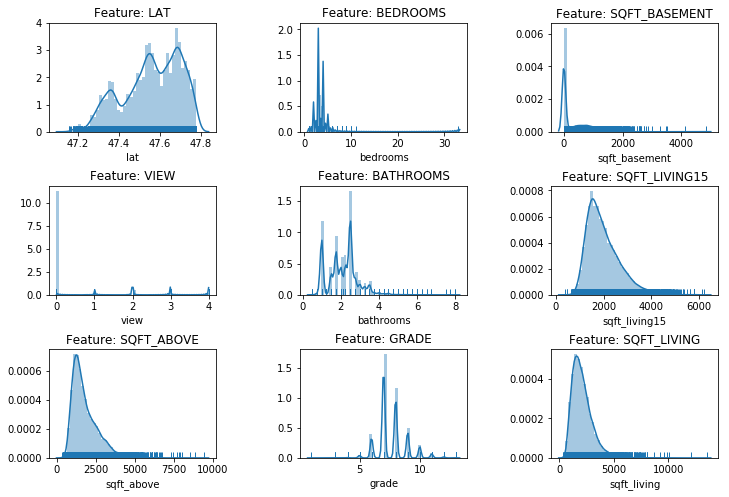

In [65]:
#Distribution plots for each independent feature
axes= ["axes1","axes2","axes3","axes4","axes5","axes6","axes7","axes8","axes9"]
fig,axes=plt.subplots(3,3,figsize=(12,8))
x=final_data.columns
x=x[:-1]
fig.subplots_adjust(hspace=0.5,wspace=0.5)
for ax,feature,name in zip(axes.flatten(),range(0,10),x):
    sns.distplot(final_data[name],rug=True,ax=ax)
    ax.set(title="Feature: "+name.upper(),xlabel=name)

From the above distribution plots of the features we can observe that the data is not uniformly distributed. We should look at the outliers of the features. This can be done by using box plot

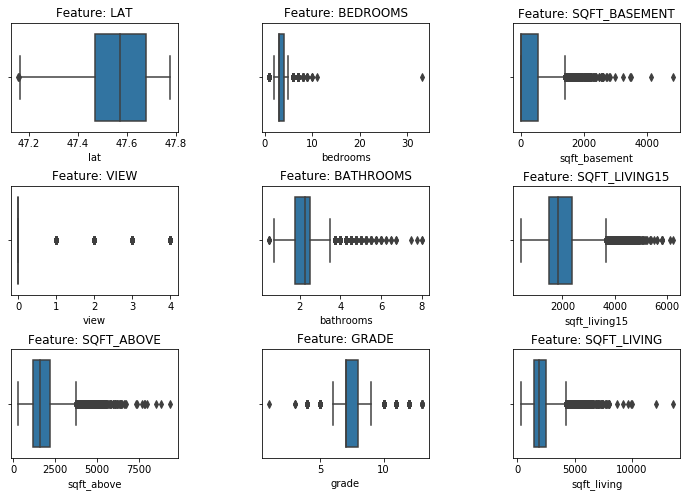

In [66]:
#Box plot for each feature
axes= ["axes1","axes2","axes3","axes4","axes5","axes6","axes7","axes8","axes9"]
fig,axes=plt.subplots(3,3,figsize=(12,8))
x=final_data.columns
x=x[:-1]
fig.subplots_adjust(hspace=0.5,wspace=0.5)
for ax,feature,name in zip(axes.flatten(),range(0,10),x):
    sns.boxplot(x=final_data[name],ax=ax)
    ax.set(title="Feature: "+name.upper(),xlabel=name)

From the box plots of all the features we can say that every feature consists of outliers. These can be cleared by replacing the outliers with nan value and then replacing nan with mean or median or mode

In [67]:
#Replacing the outliers with NAN value
q1=final_data.quantile(0.25)
q3=final_data.quantile(0.75)
IQR=q3-q1
final_data=final_data[(final_data <= (q3+1.5*IQR)) & (final_data >= (q1-1.5*IQR))]
final_data

,lat,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,sqft_living,price
0,47.5112,3.0,0.0,0.0,1.00,1340.0,1180.0,7.0,1180.0,221900.0
1,47.7210,3.0,400.0,0.0,2.25,1690.0,2170.0,7.0,2570.0,538000.0
2,47.7379,2.0,0.0,0.0,1.00,2720.0,770.0,6.0,770.0,180000.0
3,47.5208,4.0,910.0,0.0,3.00,1360.0,1050.0,7.0,1960.0,604000.0
4,47.6168,3.0,0.0,0.0,2.00,1800.0,1680.0,8.0,1680.0,510000.0
5,47.6561,4.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,47.3097,3.0,0.0,0.0,2.25,2238.0,1715.0,7.0,1715.0,257500.0
7,47.4095,3.0,0.0,0.0,1.50,1650.0,1060.0,7.0,1060.0,291850.0
8,47.5123,3.0,730.0,0.0,1.00,1780.0,1050.0,7.0,1780.0,229500.0
9,47.3684,3.0,0.0,0.0,2.50,2390.0,1890.0,7.0,1890.0,323000.0


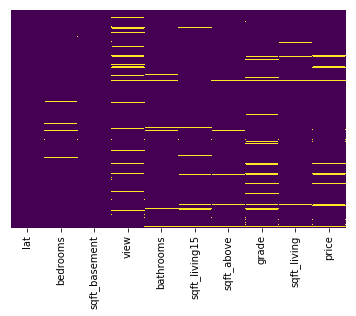

In [68]:
#NAN values in each feature of the data
sns.heatmap(final_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [69]:
a=final_data['lat']
b=final_data['grade']
c=final_data['sqft_living15']

In [70]:
#Finding no. of outliers in each feature
final_data.isnull().sum()

lat                 2
bedrooms          533
sqft_basement     496
view             2124
bathrooms         561
sqft_living15     544
sqft_above        611
grade            1911
sqft_living       572
price            1146
dtype: int64

In [71]:
#Replacing the NAN values with mean of each its espective feature
x=final_data.columns
for i in x:
    e=final_data[i].mean()
    final_data[i].replace(np.nan,e, inplace=True)
final_data.isnull().sum()

lat              0
bedrooms         0
sqft_basement    0
view             0
bathrooms        0
sqft_living15    0
sqft_above       0
grade            0
sqft_living      0
price            0
dtype: int64

In [72]:
X=final_data.drop(columns=["price"])
y=final_data["price"]

In [73]:
#Splliting of data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

Linear Regression

In [74]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [75]:
p=lr_model.predict(X_train)
lr_bn=r2_score(y_train,p)
print("MSE of train data:",mean_squared_error(y_train,p))
print("Accuracy of the training set:",lr_bn)

MSE of train data: 19456733818.215603
Accuracy of the training set: 0.5288485396902077


In [76]:
X_train.dtypes

lat              float64
bedrooms         float64
sqft_basement    float64
view             float64
bathrooms        float64
sqft_living15    float64
sqft_above       float64
grade            float64
sqft_living      float64
dtype: object

In [77]:
e=[[47.0,3.0,400.0,0,2.0,1690.0,2170.0,7.0,2570.0]]
p=lr_model.predict(e)
p
#X_train

array([178536.56495485])

In [78]:
#Applying Cross Validation to find Mean accuracy of the Linear Regression Model
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr_model, X_train, y_train, cv=10)
lr_s=lr_scores.mean()
print("Scores:", lr_scores)
print('Cross validated mean accuracy:', lr_s)

Scores: [0.52254916 0.51769719 0.54371416 0.53151238 0.51400671 0.53779574
 0.5303323  0.51299876 0.5168663  0.55097346]
Cross validated mean accuracy: 0.5278446174053383


The Cross validated mean accuracy for Linear Regression is 0.69 so the test accuracy of the model should be in that specified range.

In [79]:
p=lr_model.predict(X_test)
lr_bn=r2_score(y_test,p)
lr_bn

0.5158714547813216

Decision Tree Regressor

In [80]:
dt_model=DecisionTreeRegressor(criterion='mse',max_depth=10,max_features="auto",min_samples_leaf=5)
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=5)

In [81]:
p=dt_model.predict(X_train)
dt_bn=r2_score(y_train,p)
print("MSE of train data:",mean_squared_error(y_train,p))
print("Accuracy of the training set:",dt_bn)

MSE of train data: 11036526289.720741
Accuracy of the training set: 0.7327467432750114


In [82]:
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=10)
dt_s=dt_scores.mean()
print("Scores:", dt_scores)
print('Cross validated mean accuracy:', dt_s)

Scores: [0.62751896 0.62595038 0.64088048 0.60980765 0.62574566 0.63127581
 0.62107688 0.64280387 0.63326634 0.65214611]
Cross validated mean accuracy: 0.6310472132553661


The Cross validated mean accuracy for Decision Tree is 0.79 so the test accuracy should be in that range.

In [83]:
dt_bn=dt_model.score(X_test,y_test)
dt_bn

0.6385952196786246

Random Forest Regressor

In [84]:
rf_model=RandomForestRegressor(n_estimators=100,max_depth=10)
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10)

In [85]:
p=rf_model.predict(X_train)
rf_bn=r2_score(y_train,p)
print("MSE of train data:",mean_squared_error(y_train,p))
print("Accuracy of the training set:",rf_bn)

MSE of train data: 9225628547.576103
Accuracy of the training set: 0.7765982511208129


In [86]:
scores = cross_val_score(rf_model, X_train, y_train, cv=10)
print("Scores:", scores)
print('Cross validated mean accuracy:', scores.mean())

Scores: [0.6768939  0.68903678 0.69527286 0.67822321 0.67102734 0.69164367
 0.6845434  0.68502609 0.67889351 0.68664059]
Cross validated mean accuracy: 0.6837201344354293


In [87]:
e=[[47.0,3.0,200.0,0,2.0,1690.0,1170.0,7.0,2570.0]]
p=rf_model.predict(e)
p

array([313273.43599143])

In [88]:
rf_scores=scores
rf_s=scores.mean()
rf_bn=rf_model.score(X_test,y_test)
rf_bn

0.688344998704082

Polynomial Regression

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [90]:
pr=PolynomialFeatures(degree=4)
X_train_pr=pr.fit_transform(X_train)
X_test_pr=pr.fit_transform(X_test)
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [91]:
p=lr.predict(X_train)
po_bn=r2_score(y_train,p)
print("MSE of train data:",mean_squared_error(y_train,p))
print("Accuracy of the training set:",po_bn)

MSE of train data: 19563586945.933475
Accuracy of the training set: 0.5245825345772219


In [92]:
pr_scores = cross_val_score(lr, X_train, y_train, cv=10)
pr_s=pr_scores.mean()
print("Scores:", pr_scores)
print('Cross validated mean accuracy:', pr_s)

Scores: [0.50030743 0.52249426 0.51661109 0.52218866 0.52983168 0.54792181
 0.51357512 0.56424237 0.50929451 0.51176557]
Cross validated mean accuracy: 0.5238232497944555


In [93]:
p=lr.predict(X_test)
pr_bn=r2_score(y_test,p)
pr_bn

0.5333451440913348

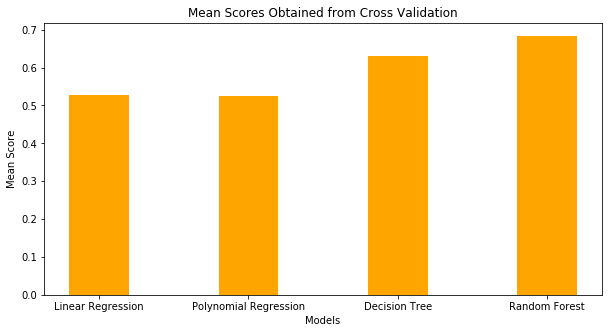

In [94]:
data={"Linear Regression":lr_s,"Polynomial Regression":pr_s,"Decision Tree":dt_s,"Random Forest":rf_s}
courses = list(data.keys()) 
values = list(data.values()) 
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values, color ='orange',width = 0.4) 
plt.xlabel("Models") 
plt.ylabel("Mean Score") 
plt.title("Mean Scores Obtained from Cross Validation") 
plt.show() 

In [95]:
import random
lat=random.randint(0,len(a))
lat=a[lat]
grade=random.randint(0,len(b))
grade=b[grade]
sqft_living15=random.randint(0,len(c))
sqft_living15=c[sqft_living15]
lat,grade,sqft_living15   
p=[[lat,3.0,400,0,2,sqft_living15,2170,grade,2570]]
pa=rf_model.predict(p)
print(pa)

[523839.37269937]


In [ ]:
from flask import Flask,flash,redirect,render_template,request,session,abort

app= Flask(__name__)
e=1
@app.route("/")
def test():
    return(render_template('index.html'))

@app.route("/", methods=['POST'])
def my():
    one=request.form['sb']
    two=request.form['sl']
    three=request.form['sa']
    four=request.form['be']
    five=request.form['ba']
    p=[[lat,four,one,0,five,sqft_living15,three,grade,two]]
    pa=rf_model.predict(p)
    pa=pa.tolist()
    #print(pa)
    return(render_template('result.html',a=one,b=two,c=three,d=four,e=five,r=str(int(pa[0]))))

if __name__== "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [27/Aug/2020 11:22:16] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/Aug/2020 11:22:17] "GET /static/house.jpg HTTP/1.1" 304 -
